In [90]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os

plt.rcParams['figure.dpi'] = 150

/Users/divya/Documents/Semester-6/High Performance Computing /Lab_7


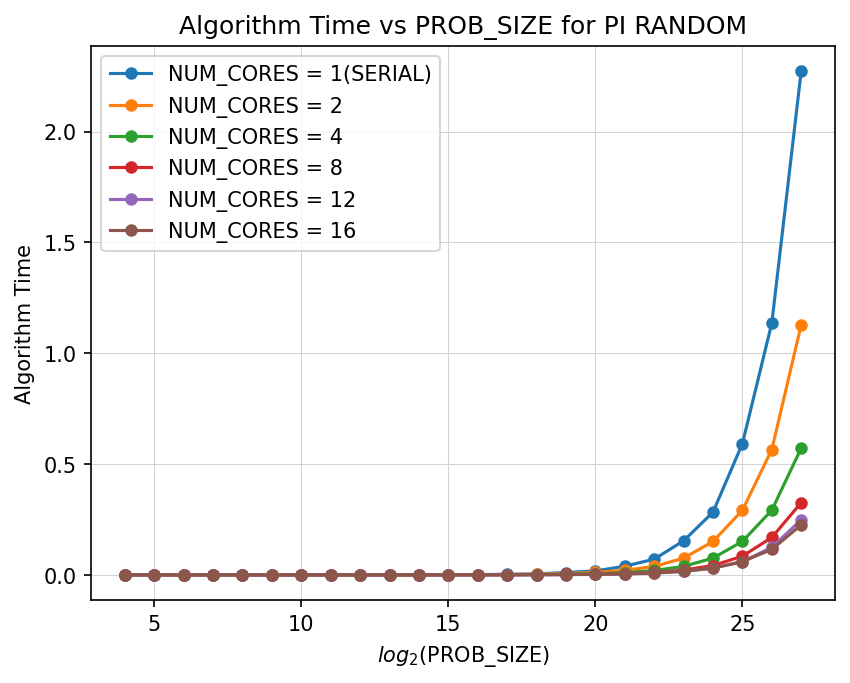

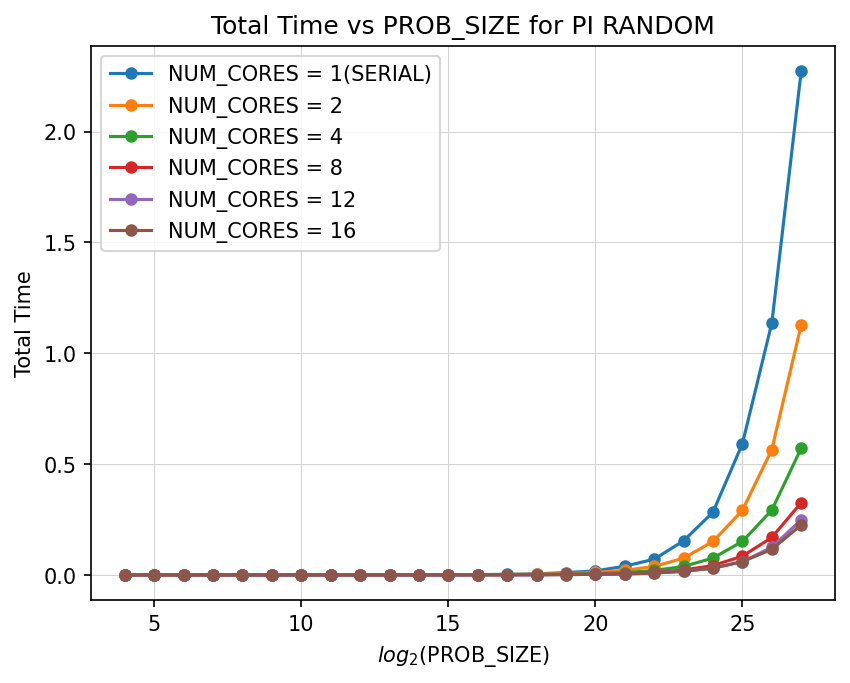

2
4
8
12
16


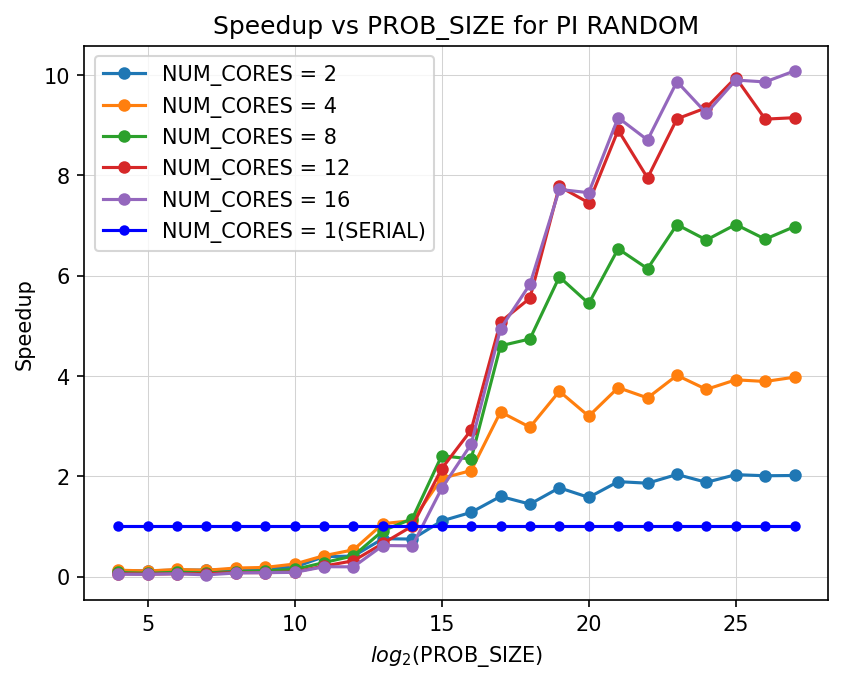

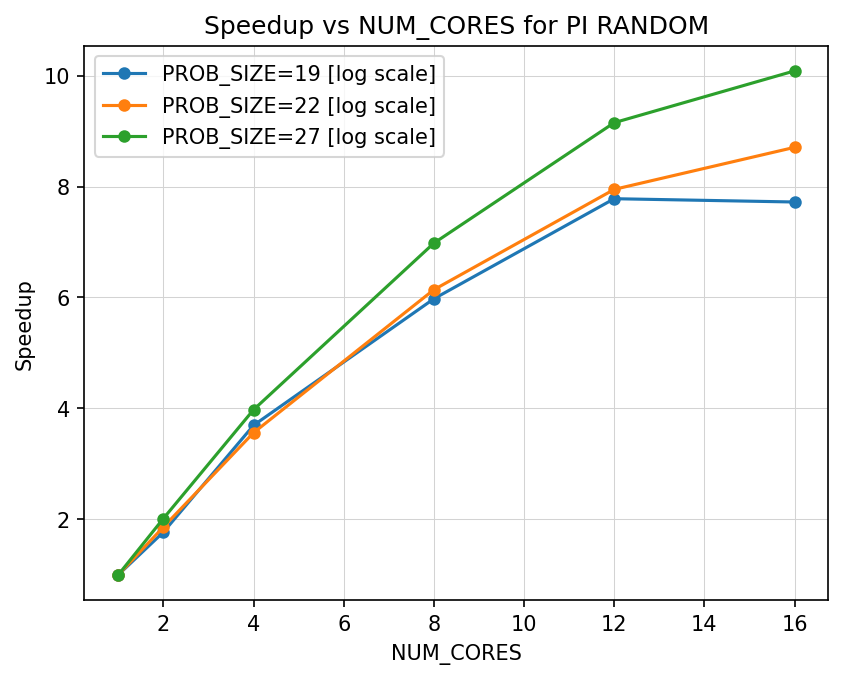

In [98]:
import os 
pwd = os.getcwd()
print(pwd)

path_Q1 = pwd + '/Cluster/data.csv'


dataQ1 = pd.read_csv(path_Q1)

num_cores = [0, 2,4,8,12,16]

dataQ1 = dataQ1[dataQ1['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1['PROB_NAME'] = 'PI_RANDOM'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],'-o', label = label,markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_cluster.png')
plt.show()

    

# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],'-o', label = label,markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_cluster.png')
plt.show()



# Plot speedup for all number of cores 2,4,8,12,16 [problem_size vs Speedup]
#Q1
plt.figure(2)
speeup = []
df0 = dataQ1[dataQ1['NUMBER_CORES'] == 0]


speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)

# Plot horizontal line for single core (represented by 0)
# plt.axhline(y=1, color='r', linestyle='--', label='NUM_CORES = 0')
array_speedup = np.array(len(speedup[0])*[1]) # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup,'-o',color = 'blue', label='NUM_CORES = 1(SERIAL)',markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_cluster.png')
plt.show()
    
    
    
# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**19, 2**22, 2**27]
for p in prob:
    plt.figure(3)
    df = dataQ1[dataQ1['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' + str(int(np.log2(p)))+' [log scale]' , markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_cluster_pr.png')
plt.show()
    

     
     

/Users/divya/Documents/Semester-6/High Performance Computing /Lab_7


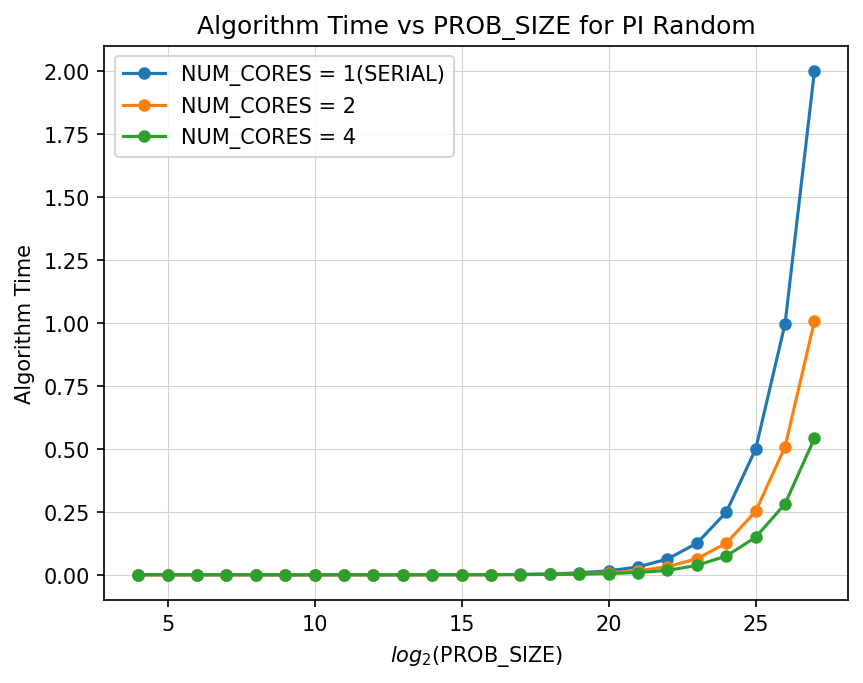

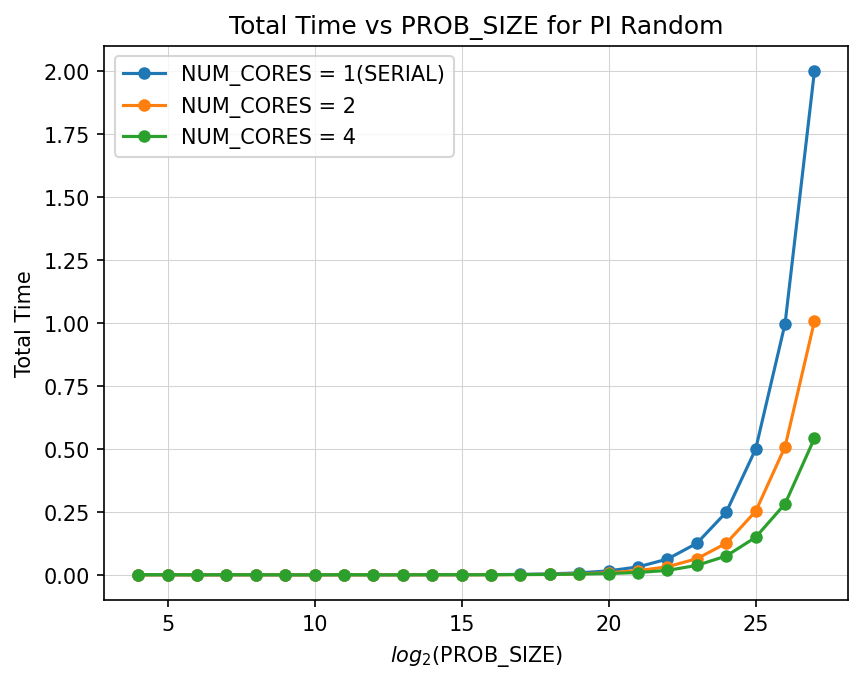

2
4


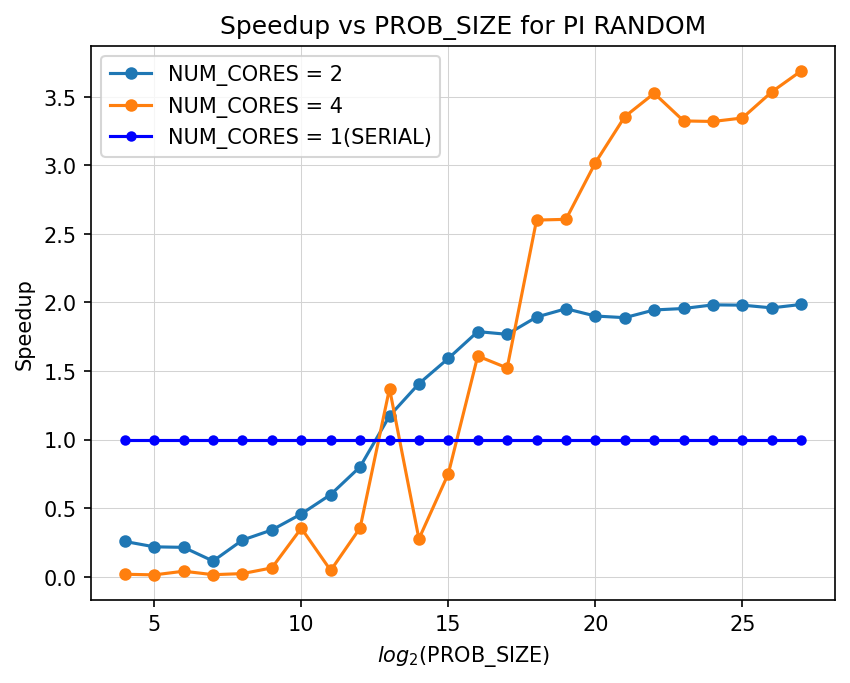

/Users/divya/Library/Python/3.9/lib/python/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

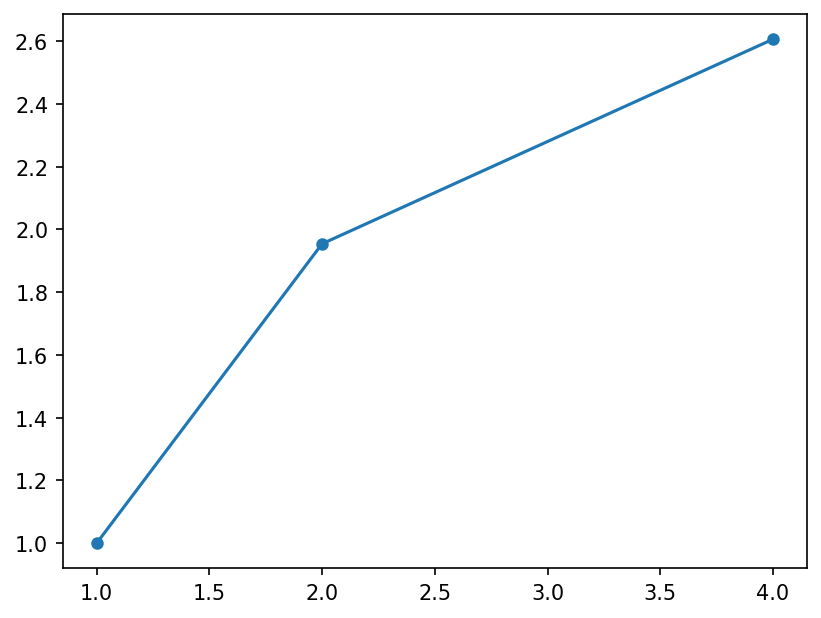

In [97]:
import os
pwd = os.getcwd()
print(pwd)

path_Q1 = pwd + '/Lab/data.csv'


dataQ1 = pd.read_csv(path_Q1)

num_cores = [0, 2, 4]

dataQ1 = dataQ1[dataQ1['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1['PROB_NAME'] = 'PI_RANDOM'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for PI Random')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_Lab.png')
plt.show()


# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for PI Random')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_Lab.png')
plt.show()


plt.figure(2)
speeup = []
df0 = dataQ1[dataQ1['NUMBER_CORES'] == 0]


speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)

# Plot horizontal line for single core (represented by 0)
# plt.axhline(y=1, color='r', linestyle='--', label='NUM_CORES = 0')
array_speedup = np.array(len(speedup[0])*[1])  # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup, '-o',
         color='blue', label='NUM_CORES = 1(SERIAL)', markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_lab.png')
plt.show()


# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**19, 2**22, 2**27]
for p in prob:
    plt.figure(3)
    df = dataQ1[dataQ1['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' + str(int(np.log2(p)))+' [log scale]' , markersize=5)
num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_lab_pr.png')
plt.show()


/Users/divya/Documents/Semester-6/High Performance Computing /Lab_7


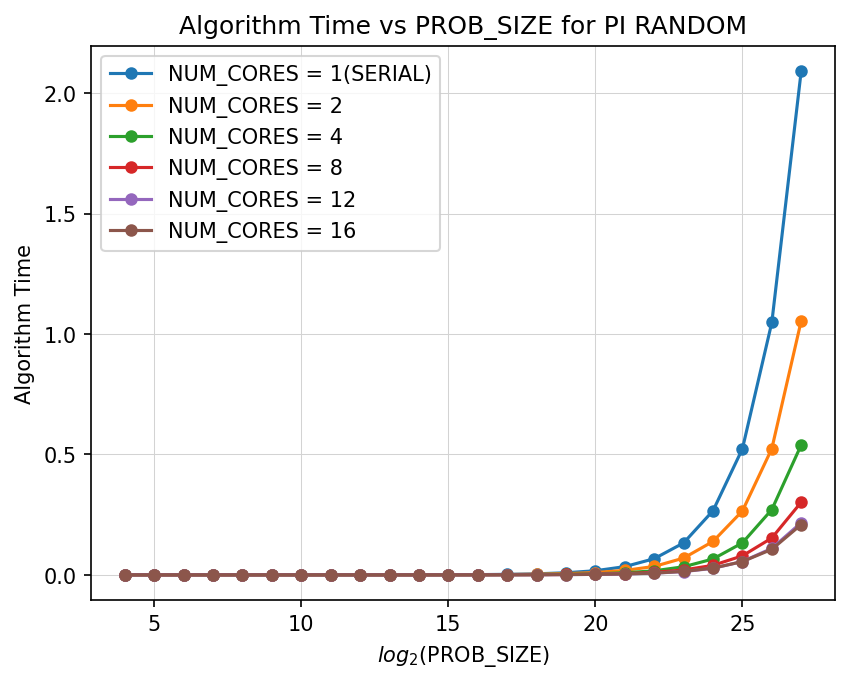

2
4
8
12
16


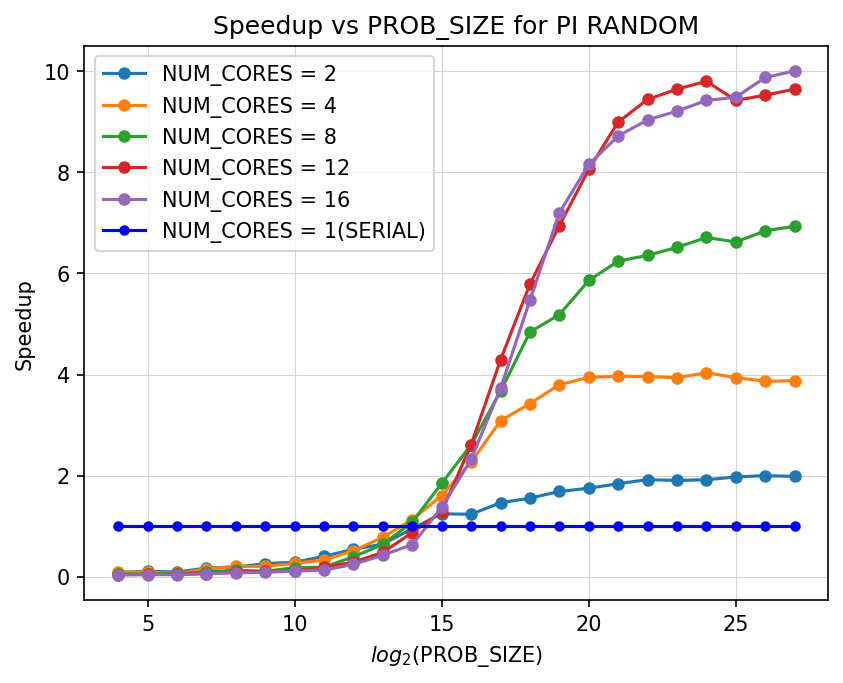

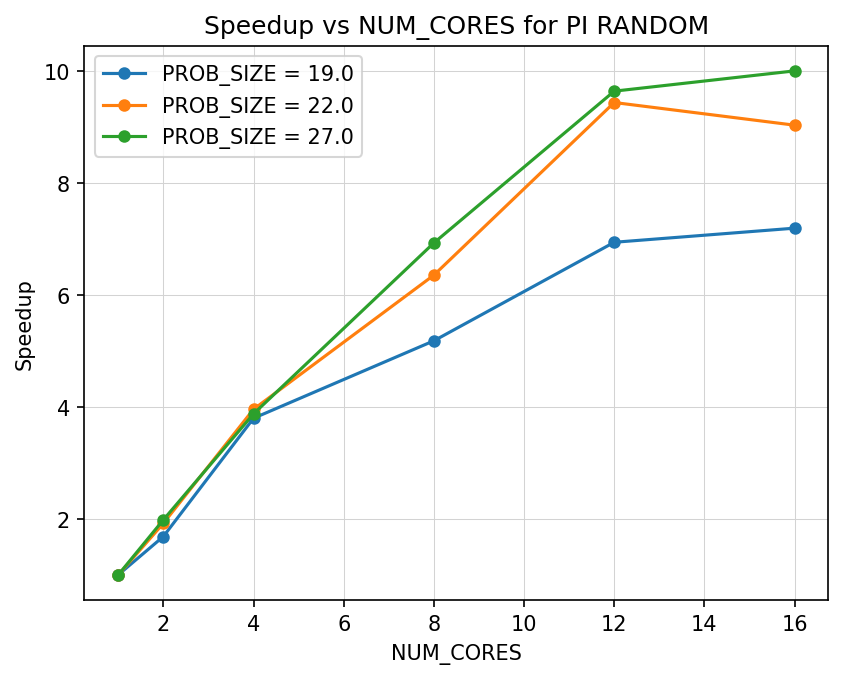

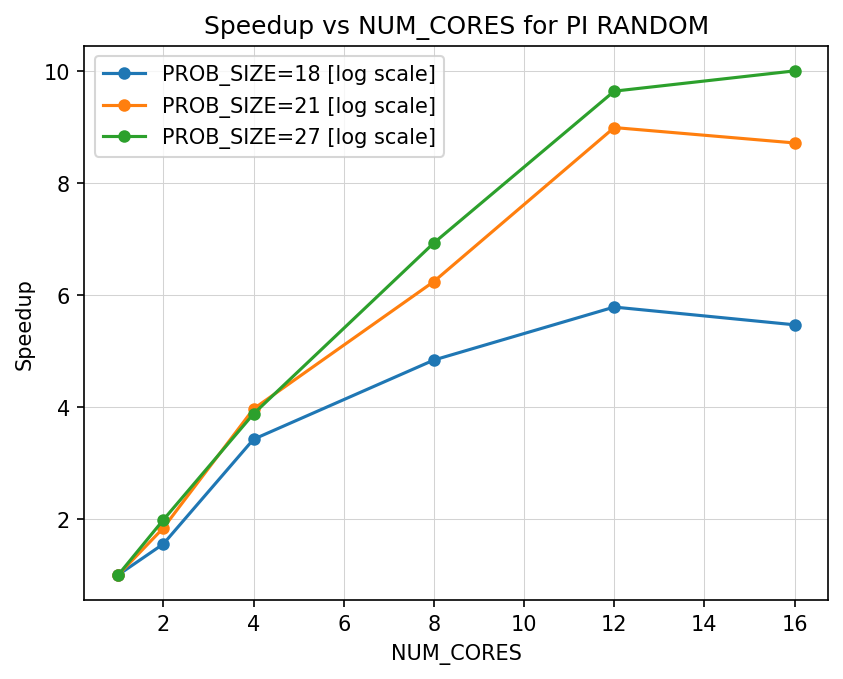

In [105]:
import os
pwd = os.getcwd()
print(pwd)

path_Q1 = pwd + '/AVX/Cluster/data.csv'


dataQ1_cluster = pd.read_csv(path_Q1)

num_cores = [0, 2, 4, 8, 12, 16]

dataQ1_cluster = dataQ1_cluster[dataQ1_cluster['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1_cluster['PROB_NAME'] = 'PI_RANDOM'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1_cluster[dataQ1_cluster['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_cluster_simd.png')
plt.show()


plt.figure(2)
speeup = []
df0 = dataQ1_cluster[dataQ1_cluster['NUMBER_CORES'] == 0]
speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1_cluster[dataQ1_cluster['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)


# plt.axhline(y=1, color='r', linestyle='--', label='NUM_CORES = 0')
array_speedup = np.array(len(speedup[0])*[1])  # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup, '-o',
         color='blue', label='NUM_CORES = 1(SERIAL)', markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_cluster_simd.png')
plt.show()


# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**19, 2**22, 2**27]
for p in prob:
    plt.figure(3)
    df = dataQ1_cluster[dataQ1_cluster['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o',
             label='PROB_SIZE = ' + str(np.log2(p)), markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_cluster_pr_simd.png')
plt.show()

# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**18, 2**21, 2**27]
for p in prob:
    plt.figure(3)
    df = dataQ1_cluster[dataQ1_cluster['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' +
             str(int(np.log2(p)))+' [log scale]', markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_lab_pr.png')
plt.show()


/Users/divya/Documents/Semester-6/High Performance Computing /Lab_7


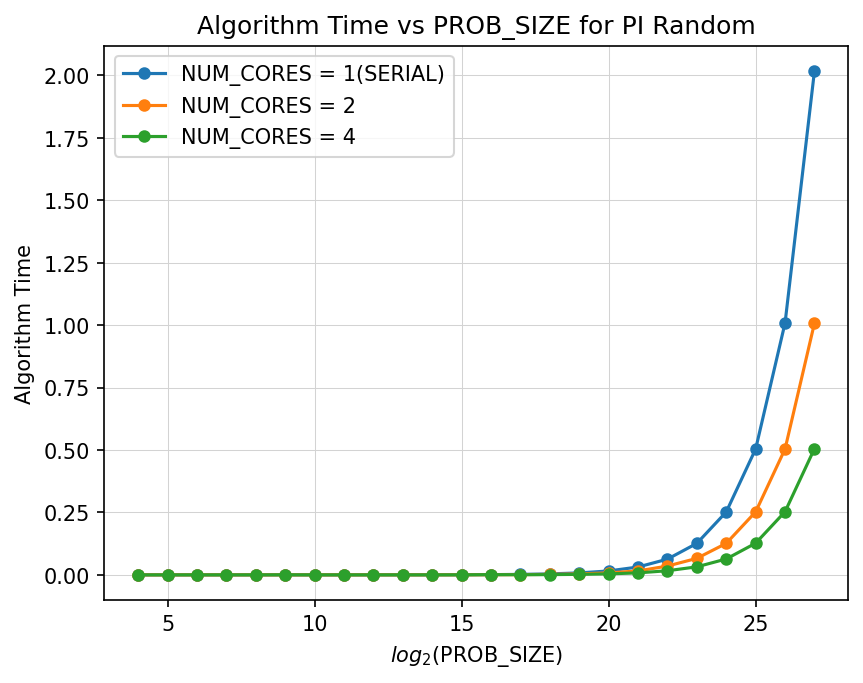

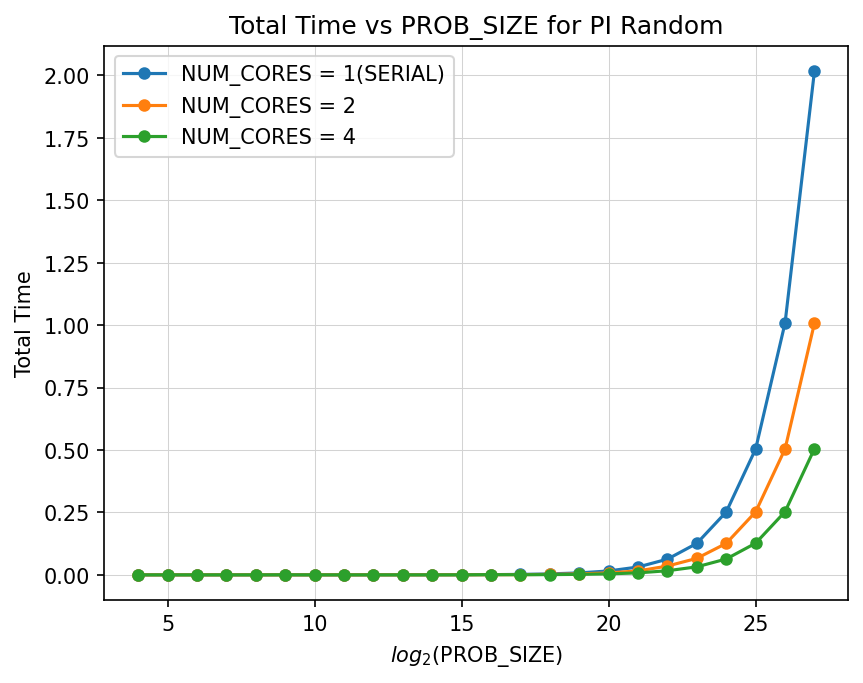

2
4


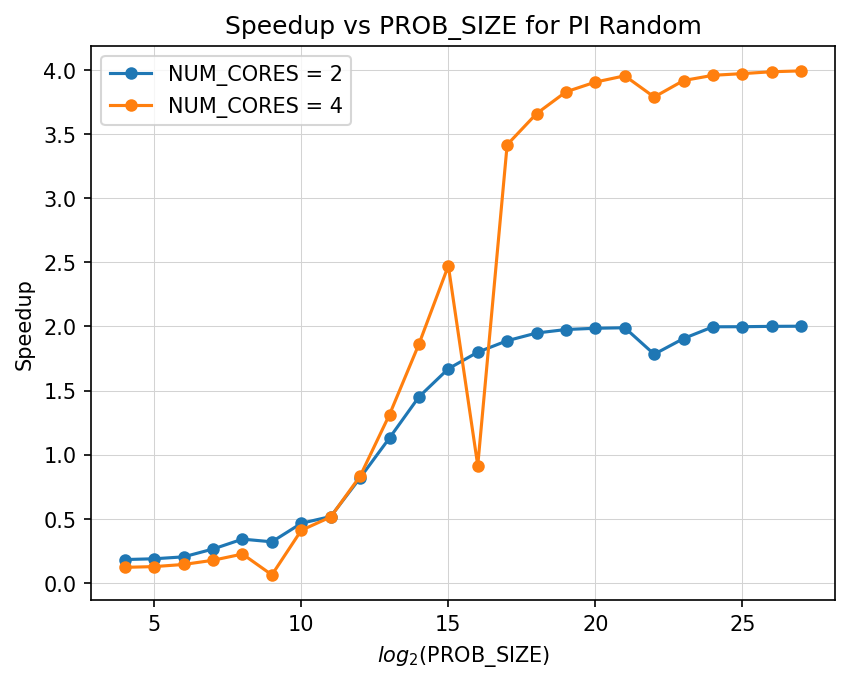

2
4


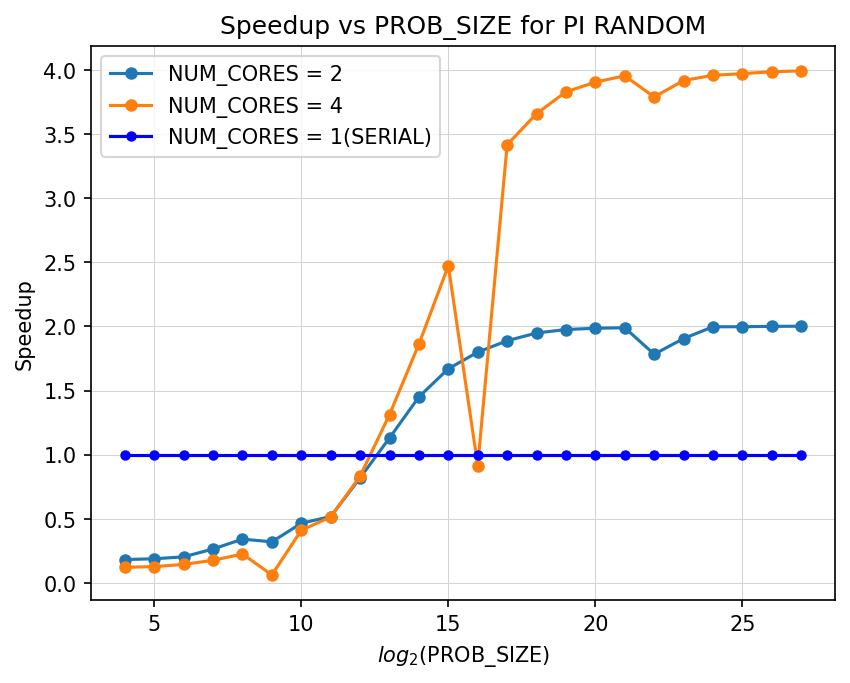

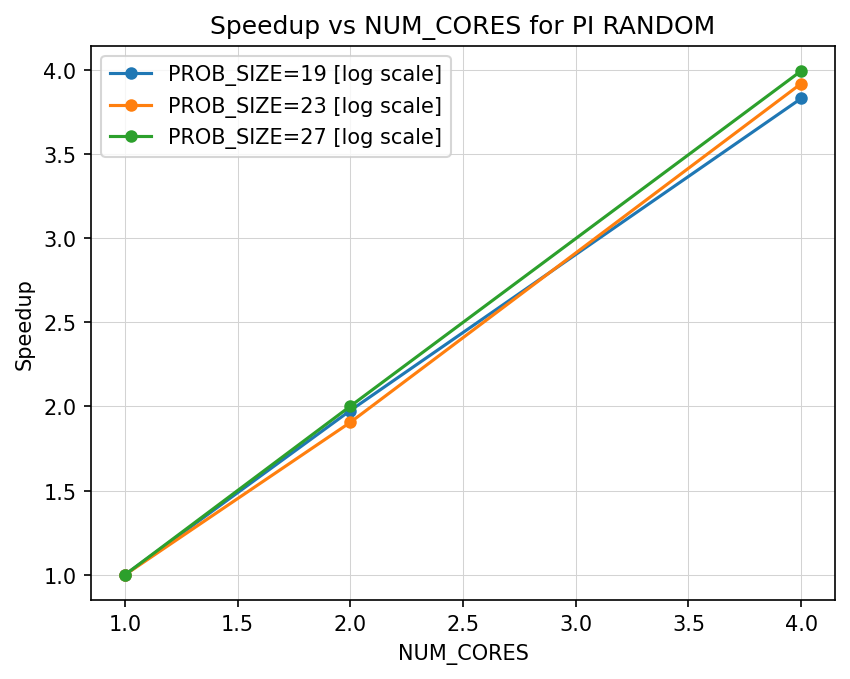

In [107]:
import os
pwd = os.getcwd()
print(pwd)

path_Q1 = pwd + '/AVX/Lab/data.csv'


dataQ1 = pd.read_csv(path_Q1)

num_cores = [0, 2, 4]

dataQ1 = dataQ1[dataQ1['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1['PROB_NAME'] = 'PI_RANDOM'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for PI Random')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_lab_simd.png')
plt.show()


# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for PI Random')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_lab_simd.png')
plt.show()


# Plot speedup for all number of cores 2,4,8,12,16 [problem_size vs Speedup]
#Q1
plt.figure(2)
speeup = []
df0 = dataQ1[dataQ1['NUMBER_CORES'] == 0]
# num_cores[0] = 1

for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speeup.append(speedup)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for PI Random')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_lab_simd.png')
plt.show()


plt.figure(2)
speeup = []
df0 = dataQ1[dataQ1['NUMBER_CORES'] == 0]


speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1[dataQ1['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)

# Plot horizontal line for single core (represented by 0)
# plt.axhline(y=1, color='r', linestyle='--', label='NUM_CORES = 0')
array_speedup = np.array(len(speedup[0])*[1])  # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup, '-o',
         color='blue', label='NUM_CORES = 1(SERIAL)', markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_lab.png')
plt.show()

# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**19, 2**23, 2**27]
for p in prob:
    plt.figure(3)
    df = dataQ1[dataQ1['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' +
             str(int(np.log2(p)))+' [log scale]', markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for PI RANDOM')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_lab_pr.png')
plt.show()


# COncat data_Q1_cluster and data_Q1

df = pd.concat([dataQ1_cluster, dataQ1], ignore_index=True)
df.to_csv('11_L7_PI_RANDOM.csv', index=False)